In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=232b997cce30b50f0b8d804e39b6dab9c41a43569f332e0489a624e723d79223
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [3]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install tensorflow
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.6 MB/s eta 0:00:00


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
from gensim.models import Word2Vec
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from transformers import TFBertModel, BertTokenizer, AutoTokenizer, TFAutoModel
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [7]:
code = pd.read_excel(r"/content/totalmerged.xlsx")
code

,Question,Correct_Code,Code_with_Error,Total_Marks
0,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,7
1,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,8
2,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,5
3,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\n\nvoid printFactors(int nu...,7
4,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\n\nvoid printFactors(int nu...,5
...,...,...,...,...
995,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\n#define MAX_SIZE 100 \n...,7
996,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\nchar getMaxOccurringCha...,6
997,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\nchar getMaxOccurringCha...,6
998,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\n#define ASCII_SIZE 128 ...,5


In [8]:
documents = code['Question'] +  code['Code_with_Error']


In [9]:
# Step 2: Train the Word2Vec model
tokenized_documents = [doc.split() for doc in documents]
model = Word2Vec(tokenized_documents, vector_size=100, window=5, min_count=1, workers=4)


In [10]:
# Step 3: Create numerical features from Word2Vec word vectors
num_features = model.vector_size
X = np.zeros((len(tokenized_documents), num_features))
for i, tokens in enumerate(tokenized_documents):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if word_vectors:
        X[i] = np.mean(word_vectors, axis=0)


In [11]:
y = code['Total_Marks']

In [12]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Apply LazyRegressor
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 26%|██▌       | 11/42 [00:03<00:09,  3.17it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████| 42/42 [00:43<00:00,  1.04s/it]


In [ ]:
# Step 6: Print the model performance
print(models)

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                         -0.63       0.19    2.09   
RandomForestRegressor                       -0.65       0.18    2.10   
GradientBoostingRegressor                   -0.66       0.17    2.11   
MLPRegressor                                -0.69       0.16    2.12   
LassoLarsCV                                 -0.72       0.15    2.14   
LGBMRegressor                               -0.72       0.15    2.14   
LassoLarsIC                                 -0.73       0.14    2.16   
HistGradientBoostingRegressor               -0.76       0.12    2.17   
RidgeCV                                     -0.79       0.11    2.19   
BayesianRidge                               -0.79       0.11    2.19   
Ridge                                       -0.79       0.11    2.19   
ElasticNetCV                                -0.81       0.10    

In [13]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Gradient Boosting Regressor
gra_regressor = GradientBoostingRegressor()
gra_regressor.fit(X_train, y_train)
y_train_pred_gra = gra_regressor.predict(X_train)
y_test_pred_gra = gra_regressor.predict(X_test)

from sklearn.ensemble import ExtraTreesRegressor
# ExtraTreesRegressor
et_regressor = ExtraTreesRegressor()
et_regressor.fit(X_train, y_train)
y_train_pred_et = et_regressor.predict(X_train)
y_test_pred_et = et_regressor.predict(X_test)

# CatBoost Regressor
catboost_regressor = CatBoostRegressor()
catboost_regressor.fit(X_train, y_train)
y_train_pred_catboost = catboost_regressor.predict(X_train)
y_test_pred_catboost = catboost_regressor.predict(X_test)

# LGBM Regressor
xgb_regressor = lgb.LGBMRegressor()
xgb_regressor.fit(X_train, y_train)
y_train_pred_xgb = xgb_regressor.predict(X_train)
y_test_pred_xgb = xgb_regressor.predict(X_test)

Learning rate set to 0.039525
0:	learn: 2.2425241	total: 78.8ms	remaining: 1m 18s
1:	learn: 2.2243937	total: 104ms	remaining: 51.6s
2:	learn: 2.2082143	total: 129ms	remaining: 42.9s
3:	learn: 2.1921174	total: 156ms	remaining: 38.9s
4:	learn: 2.1759749	total: 179ms	remaining: 35.7s
5:	learn: 2.1589245	total: 206ms	remaining: 34.1s
6:	learn: 2.1437221	total: 229ms	remaining: 32.5s
7:	learn: 2.1292579	total: 255ms	remaining: 31.6s
8:	learn: 2.1154902	total: 279ms	remaining: 30.7s
9:	learn: 2.1003076	total: 303ms	remaining: 30s
10:	learn: 2.0897944	total: 326ms	remaining: 29.3s
11:	learn: 2.0794117	total: 349ms	remaining: 28.8s
12:	learn: 2.0686776	total: 373ms	remaining: 28.3s
13:	learn: 2.0582494	total: 397ms	remaining: 28s
14:	learn: 2.0460363	total: 436ms	remaining: 28.6s
15:	learn: 2.0339085	total: 461ms	remaining: 28.3s
16:	learn: 2.0243822	total: 485ms	remaining: 28s
17:	learn: 2.0146396	total: 508ms	remaining: 27.7s
18:	learn: 2.0032703	total: 531ms	remaining: 27.4s
19:	learn: 1.99

In [14]:
# Calculate evaluation metrics
mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

mape_train_gra = mean_absolute_percentage_error(y_train, y_train_pred_gra)
mape_test_gra = mean_absolute_percentage_error(y_test, y_test_pred_gra)
r2_train_gra = r2_score(y_train, y_train_pred_gra)
r2_test_gra = r2_score(y_test, y_test_pred_gra)
rmse_train_gra = mean_squared_error(y_train, y_train_pred_gra, squared=False)
rmse_test_gra = mean_squared_error(y_test, y_test_pred_gra, squared=False)
mae_train_gra = mean_absolute_error(y_train, y_train_pred_gra)
mae_test_gra = mean_absolute_error(y_test, y_test_pred_gra)

mape_train_et = mean_absolute_percentage_error(y_train, y_train_pred_et)
mape_test_et = mean_absolute_percentage_error(y_test, y_test_pred_et)
r2_train_et = r2_score(y_train, y_train_pred_et)
r2_test_et = r2_score(y_test, y_test_pred_et)
rmse_train_et = mean_squared_error(y_train, y_train_pred_et, squared=False)
rmse_test_et = mean_squared_error(y_test, y_test_pred_et, squared=False)
mae_train_et = mean_absolute_error(y_train, y_train_pred_et)
mae_test_et = mean_absolute_error(y_test, y_test_pred_et)

mape_train_catboost = mean_absolute_percentage_error(y_train, y_train_pred_catboost)
mape_test_catboost = mean_absolute_percentage_error(y_test, y_test_pred_catboost)
r2_train_catboost = r2_score(y_train, y_train_pred_catboost)
r2_test_catboost = r2_score(y_test, y_test_pred_catboost)
rmse_train_catboost = mean_squared_error(y_train, y_train_pred_catboost, squared=False)
rmse_test_catboost = mean_squared_error(y_test, y_test_pred_catboost, squared=False)
mae_train_catboost = mean_absolute_error(y_train, y_train_pred_catboost)
mae_test_catboost = mean_absolute_error(y_test, y_test_pred_catboost)

mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
rmse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)


In [15]:
# Print the evaluation results
print("Random Forest Regressor:")
print("MAPE (Train):", mape_train_rf)
print("MAPE (Test):", mape_test_rf)
print("R2 Score (Train):", r2_train_rf)
print("R2 Score (Test):", r2_test_rf)
print("RMSE (Train):", rmse_train_rf)
print("RMSE (Test):", rmse_test_rf)
print("MAE (Train):", mae_train_rf)
print("MAE (Test):", mae_test_rf)
print()

print("Gradient Boosting Regressor:")
print("MAPE (Train):", mape_train_gra)
print("MAPE (Test):", mape_test_gra)
print("R2 Score (Train):", r2_train_gra)
print("R2 Score (Test):", r2_test_gra)
print("RMSE (Train):", rmse_train_gra)
print("RMSE (Test):", rmse_test_gra)
print("MAE (Train):", mae_train_gra)
print("MAE (Test):", mae_test_gra)
print()

print("Extra Tree Regressor:")
print("MAPE (Train):", mape_train_et)
print("MAPE (Test):", mape_test_et)
print("R2 Score (Train):", r2_train_et)
print("R2 Score (Test):", r2_test_et)
print("RMSE (Train):", rmse_train_et)
print("RMSE (Test):", rmse_test_et)
print("MAE (Train):", mae_train_et)
print("MAE (Test):", mae_test_et)
print()

print("CatBoost Regressor:")
print("MAPE (Train):", mape_train_catboost)
print("MAPE (Test):", mape_test_catboost)
print("R2 Score (Train):", r2_train_catboost)
print("R2 Score (Test):", r2_test_catboost)
print("RMSE (Train):", rmse_train_catboost)
print("RMSE (Test):", rmse_test_catboost)
print("MAE (Train):", mae_train_catboost)
print("MAE (Test):", mae_test_catboost)
print()

print("LGBM Regressor:")
print("MAPE (Train):", mape_train_xgb)
print("MAPE (Test):", mape_test_xgb)
print("R2 Score (Train):", r2_train_xgb)
print("R2 Score (Test):", r2_test_xgb)
print("RMSE (Train):", rmse_train_xgb)
print("RMSE (Test):", rmse_test_xgb)
print("MAE (Train):", mae_train_xgb)
print("MAE (Test):", mae_test_xgb)

Random Forest Regressor:
MAPE (Train): 29498577559276.895
MAPE (Test): 296637095456136.94
R2 Score (Train): 0.8674692951968865
R2 Score (Test): 0.19281476503144956
RMSE (Train): 0.8229364779202366
RMSE (Test): 2.0848287396397276
MAE (Train): 0.5580531711003486
MAE (Test): 1.5512949215978837

Gradient Boosting Regressor:
MAPE (Train): 29252837372190.03
MAPE (Test): 281824963130405.2
R2 Score (Train): 0.7228942582527063
R2 Score (Test): 0.16488810593374004
RMSE (Train): 1.1899557778046619
RMSE (Test): 2.1205871001613312
MAE (Train): 0.921972734528343
MAE (Test): 1.6103269093005446

Extra Tree Regressor:
MAPE (Train): 0.0280892148526077
MAPE (Test): 249499419356325.8
R2 Score (Train): 0.9520158262854794
R2 Score (Test): 0.19167970253243283
RMSE (Train): 0.49517312989643186
RMSE (Test): 2.086294065992596
MAE (Train): 0.1014404761904761
MAE (Test): 1.538697619047619

CatBoost Regressor:
MAPE (Train): 8955530992134.062
MAPE (Test): 250133883595145.16
R2 Score (Train): 0.8981121206316269
R2 S

**GRAPHS**

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from scipy.stats import zscore
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import norm
import statistics
%matplotlib inline

In [19]:
y_train_pred_rounded = np.round(y_train_pred_catboost)
y_test_rounded = np.round(y_test)
y_test_pred_rounded = np.round(y_test_pred_catboost)

<function matplotlib.pyplot.show(close=None, block=None)>

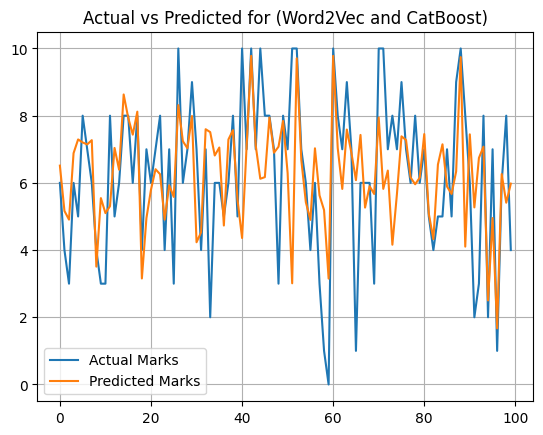

In [21]:
plt.plot(list(y_test_rounded[:100]), label="Actual Marks")
plt.plot(list(y_test_pred_catboost[:100]), label="Predicted Marks")
plt.xlabel = ('samples')
plt.ylabel = ('marks')
plt.title('Actual vs Predicted for (Word2Vec and CatBoost)')
plt.grid(True)
legend = plt.legend()
plt.show